# Skew - t

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units


from datetime import datetime 
from metpy.plots import SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
from siphon.simplewebservice.wyoming import WyomingUpperAir

import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from scipy.stats import pearsonr


# PyroCb

In [2]:
date = datetime(2021,7,1)
station = "ZXS"
df_pyrocb2 = WyomingUpperAir.request_data(date, station)
d_pyrocb2 = pandas_dataframe_to_unit_arrays(df_pyrocb2)
df_pyrocb2.loc[(df_pyrocb2.temperature<-40) & (df_pyrocb2.temperature>-44)]

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
52      277.0   10189        -40.1     -50.1      192.0   60.0  12.474701   
53      269.9   10363        -41.6     -51.1      195.0   63.0  16.305600   
129      15.9   28651        -43.4     -70.3       90.0   25.0 -25.000000   
130      15.2   28956        -42.6     -69.7       90.0   20.0 -20.000000   
131      14.5   29261        -41.7     -69.1       95.0   26.0 -25.901062   
133      12.2   30480        -40.2     -67.4      115.0   19.0 -17.219848   
134      11.9   30622        -40.3     -67.3       96.0   16.0 -15.912350   

           v_wind station  station_number       time  latitude  longitude  \
52   5.868886e+01     ZXS           71908 2021-07-01      53.9    -122.79   
53   6.085333e+01     ZXS           71908 2021-07-01      53.9    -122.79   
129 -1.530808e-15     ZXS           71908 2021-07-01      53.9    -122.79   
130 -1.224647e-15     ZXS           71908 2021-07-01      53.9    -122.79   
131  2.266049e+00     ZXS           71908 2021-07-01      53.9    -122.79   
133  8.029747e+00     ZXS           71908 2021-07-01      53.9    -122.79   
134  1.672455e+00     ZXS           71908 2021-07-01      53.9    -122.79   

     elevation     pw  
52       601.0  33.86  
53       601.0  33.86  
129      601.0  33.86  
130      601.0  33.86  
131      601.0  33.86  
133      601.0  33.86  
134      601.0  33.86

In [3]:
date = datetime(2021,6,30)
station = "ZXS"
df_pyrocb1 = WyomingUpperAir.request_data(date, station)
d_pyrocb1 = pandas_dataframe_to_unit_arrays(df_pyrocb1)
df_pyrocb1.loc[df_pyrocb1.temperature<-53]

pressure  height  temperature  dewpoint  direction  speed        u_wind  \
49      217.0   11881        -53.1     -63.1      215.0   53.0  3.039955e+01   
50      216.8   11887        -53.1     -63.1      215.0   53.0  3.039955e+01   
52      213.0   12002        -53.3     -63.3      217.0   52.0  3.129438e+01   
54      200.0   12410        -53.5     -65.5      225.0   49.0  3.464823e+01   
55      197.3   12497        -54.0     -66.0      225.0   51.0  3.606245e+01   
56      194.0   12604        -54.7     -66.7      222.0   48.0  3.211827e+01   
57      193.0   12637        -54.5     -66.5      222.0   48.0  3.211827e+01   
58      191.0   12704        -54.7     -67.7      220.0   46.0  2.956823e+01   
59      190.0   12737        -54.1     -67.1      219.0   45.0  2.831942e+01   
60      188.0   12805        -54.3     -67.3      217.0   43.0  2.587805e+01   
61      187.0   12839        -54.1     -67.1      217.0   43.0  2.587805e+01   
62      182.0   13011        -54.3     -68.3      212.0   38.0  2.013693e+01   
63      181.0   13047        -54.1     -68.1      211.0   37.0  1.905641e+01   
64      179.3   13106        -54.4     -68.5      210.0   36.0  1.800000e+01   
65      170.9   13411        -55.9     -70.4      215.0   31.0  1.778087e+01   
66      161.0   13788        -57.7     -72.7      221.0   28.0  1.836965e+01   
67      158.0   13906        -58.1     -73.1      223.0   27.0  1.841396e+01   
68      155.1   14021        -58.7     -73.7      225.0   26.0  1.838478e+01   
69      150.0   14230        -59.7     -74.7      200.0   23.0  7.866463e+00   
70      146.0   14399        -61.1     -76.1      194.0   25.0  6.048047e+00   
71      143.0   14528        -60.7     -76.7      189.0   26.0  4.067296e+00   
72      142.0   14572        -60.7     -76.7      187.0   26.0  3.168603e+00   
73      140.7   14630        -60.9     -76.7      185.0   27.0  2.353205e+00   
74      135.0   14886        -61.5     -76.5      193.0   29.0  6.523581e+00   
75      130.0   15120        -63.1     -78.1      200.0   31.0  1.060262e+01   
76      127.5   15240        -62.0     -77.4      200.0   31.0  1.060262e+01   
77      121.4   15545        -59.1     -75.6      215.0   33.0  1.892802e+01   
78      119.0   15671        -57.9     -74.9      216.0   30.0  1.763356e+01   
79      117.0   15778        -58.1     -75.1      218.0   27.0  1.662286e+01   
80      116.0   15832        -58.1     -75.1      218.0   25.0  1.539154e+01   
81      105.0   16459        -61.2     -79.1      225.0    9.0  6.363961e+00   
82      104.0   16516        -61.5     -79.5      217.0   11.0  6.619965e+00   
83      100.0   16760        -60.5     -78.5      180.0   20.0 -2.449294e-15   
84       99.9   16764        -60.5     -78.5      180.0   17.0 -2.081900e-15   
85       88.7   17511        -57.1     -77.1      221.0   16.0  1.049694e+01   
86       86.4   17678        -57.5     -77.5      230.0   16.0  1.225671e+01   
87       86.1   17699        -57.5     -77.5      231.0   16.0  1.243434e+01   
88       82.3   17983        -57.0     -77.6      250.0   14.0  1.315570e+01   
89       78.5   18288        -56.4     -77.8      205.0   14.0  5.916656e+00   
90       71.2   18898        -55.3     -78.0      225.0   12.0  8.485281e+00   
91       70.0   19010        -55.1     -78.1      180.0   13.0 -1.592041e-15   
92       67.9   19202        -55.0     -78.5      180.0   13.0 -1.592041e-15   
93       65.7   19416        -54.9     -78.9      165.0   13.0 -3.364648e+00   
94       62.3   19756        -55.5     -79.5      142.0   12.0 -7.387938e+00   
95       58.8   20127        -54.5     -79.5      117.0   12.0 -1.069208e+01   
96       56.6   20371        -55.1     -80.1      100.0   12.0 -1.181769e+01   
103      44.3   21946        -53.4     -80.6      105.0   16.0 -1.545481e+01   
104      43.5   22067        -53.7     -80.7      119.0   17.0 -1.486854e+01   
105      42.3   22250        -53.2     -80.3      140.0   19.0 -1.221296e+01   

    

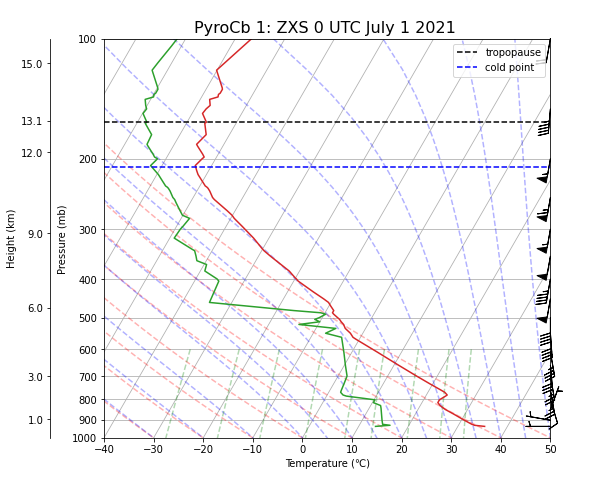

In [4]:
fig = plt.figure(figsize=(8, 16))
skew = SkewT(fig)

skew.plot(d_pyrocb2["pressure"], d_pyrocb2["temperature"], 'tab:red')
skew.plot(d_pyrocb2["pressure"], d_pyrocb2["dewpoint"], 'tab:green')

# Set some better labels than the default
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (mb)')

# Set spacing interval--Every 50 mb from 1000 to 100 mb
my_interval = np.arange(100, 1000, 50) * units('mbar')

# Get indexes of values closest to defined interval
ix = mpcalc.resample_nn_1d(d_pyrocb2["pressure"], my_interval)

# Plot only values nearest to defined interval values
skew.plot_barbs(d_pyrocb2["pressure"][ix], d_pyrocb2["u_wind"][ix], d_pyrocb2["v_wind"][ix])

# Add the relevant special lines
skew.plot_dry_adiabats(alpha = 0.3)
skew.plot_moist_adiabats(alpha = 0.3)
skew.plot_mixing_lines(alpha = 0.3)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 50)

# add height labels to right y axis


"""decimate = 5
for p, t, h in zip(d_pyrocb2["pressure"][::decimate], d_pyrocb2["temperature"][::decimate], 
                  d_pyrocb2["height"][::decimate]):
    if p >= 100 * units.hPa: 
        skew.ax2.text(1.08, p, round(h.m / 1000, 0), transform=skew.ax2.get_yaxis_transform(which='tick2'))

plt.axhline(y=-54,  linestyle='-', color = "black")

"""

secax = skew.ax.secondary_yaxis(-0.12,
    functions=(
        lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
        lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12,13.1, 15]))
secax.yaxis.set_minor_locator(plt.NullLocator())
secax.yaxis.set_major_formatter(plt.ScalarFormatter())
secax.set_ylabel('Height (km)')


skew.ax.axhline(y=162,  linestyle='--', color = "black", label = "tropopause")
skew.ax.axhline(y=210,  linestyle='--', color = "blue", label = "cold point")
plt.legend()

plt.title("PyroCb 1: ZXS 0 UTC July 1 2021 ", fontsize = 16)
# Show the plot
plt.show()

# all data

In [5]:
# pyrocb event 1
date = datetime(2021,6,30,0)
station = "ZXS"
df_pyrocb1 = WyomingUpperAir.request_data(date, station)
d_pyrocb1 = pandas_dataframe_to_unit_arrays(df_pyrocb1)

# pyrocb event 2 
date = datetime(2021,7,1,0)
station = "ZXS"
df_pyrocb2 = WyomingUpperAir.request_data(date, station)
d_pyrocb2 = pandas_dataframe_to_unit_arrays(df_pyrocb2)

# smoke case 
date = datetime(2021,6,29,0)
station = "YYE"
df_smoke = WyomingUpperAir.request_data(date, station)
d_smoke = pandas_dataframe_to_unit_arrays(df_smoke)

# clean 1 
date = datetime(2019,6,9,0)
station = "ZXS"
df_clean1= WyomingUpperAir.request_data(date, station)
d_clean1 = pandas_dataframe_to_unit_arrays(df_clean1)

# clean 2 
date = datetime(2019,6,13,0)
station = "ZXS"
df_clean2= WyomingUpperAir.request_data(date, station)
d_clean2 = pandas_dataframe_to_unit_arrays(df_clean2)

# clean 3
date = datetime(2019,6,27,0)
station = "ZXS"
df_clean3= WyomingUpperAir.request_data(date, station)
d_clean3 = pandas_dataframe_to_unit_arrays(df_clean3)

# clean 4
date = datetime(2019,6,28,0)
station = "ZXS"
df_clean4= WyomingUpperAir.request_data(date, station)
d_clean4 = pandas_dataframe_to_unit_arrays(df_clean4)

# clean 5 
date = datetime(2021,6,15,0)
station = "WSE"
df_clean5= WyomingUpperAir.request_data(date, station)
d_clean5 = pandas_dataframe_to_unit_arrays(df_clean5)


In [6]:
# 132 , 145, 146, 122, 
np.shape(d_clean1["pressure"]), np.shape(d_clean1["height"]), np.shape(d_clean1["temperature"]), np.shape(d_clean2["pressure"]), np.shape(d_clean2["height"]), np.shape(d_clean2["temperature"])



((146,), (146,), (146,), (122,), (122,), (122,))

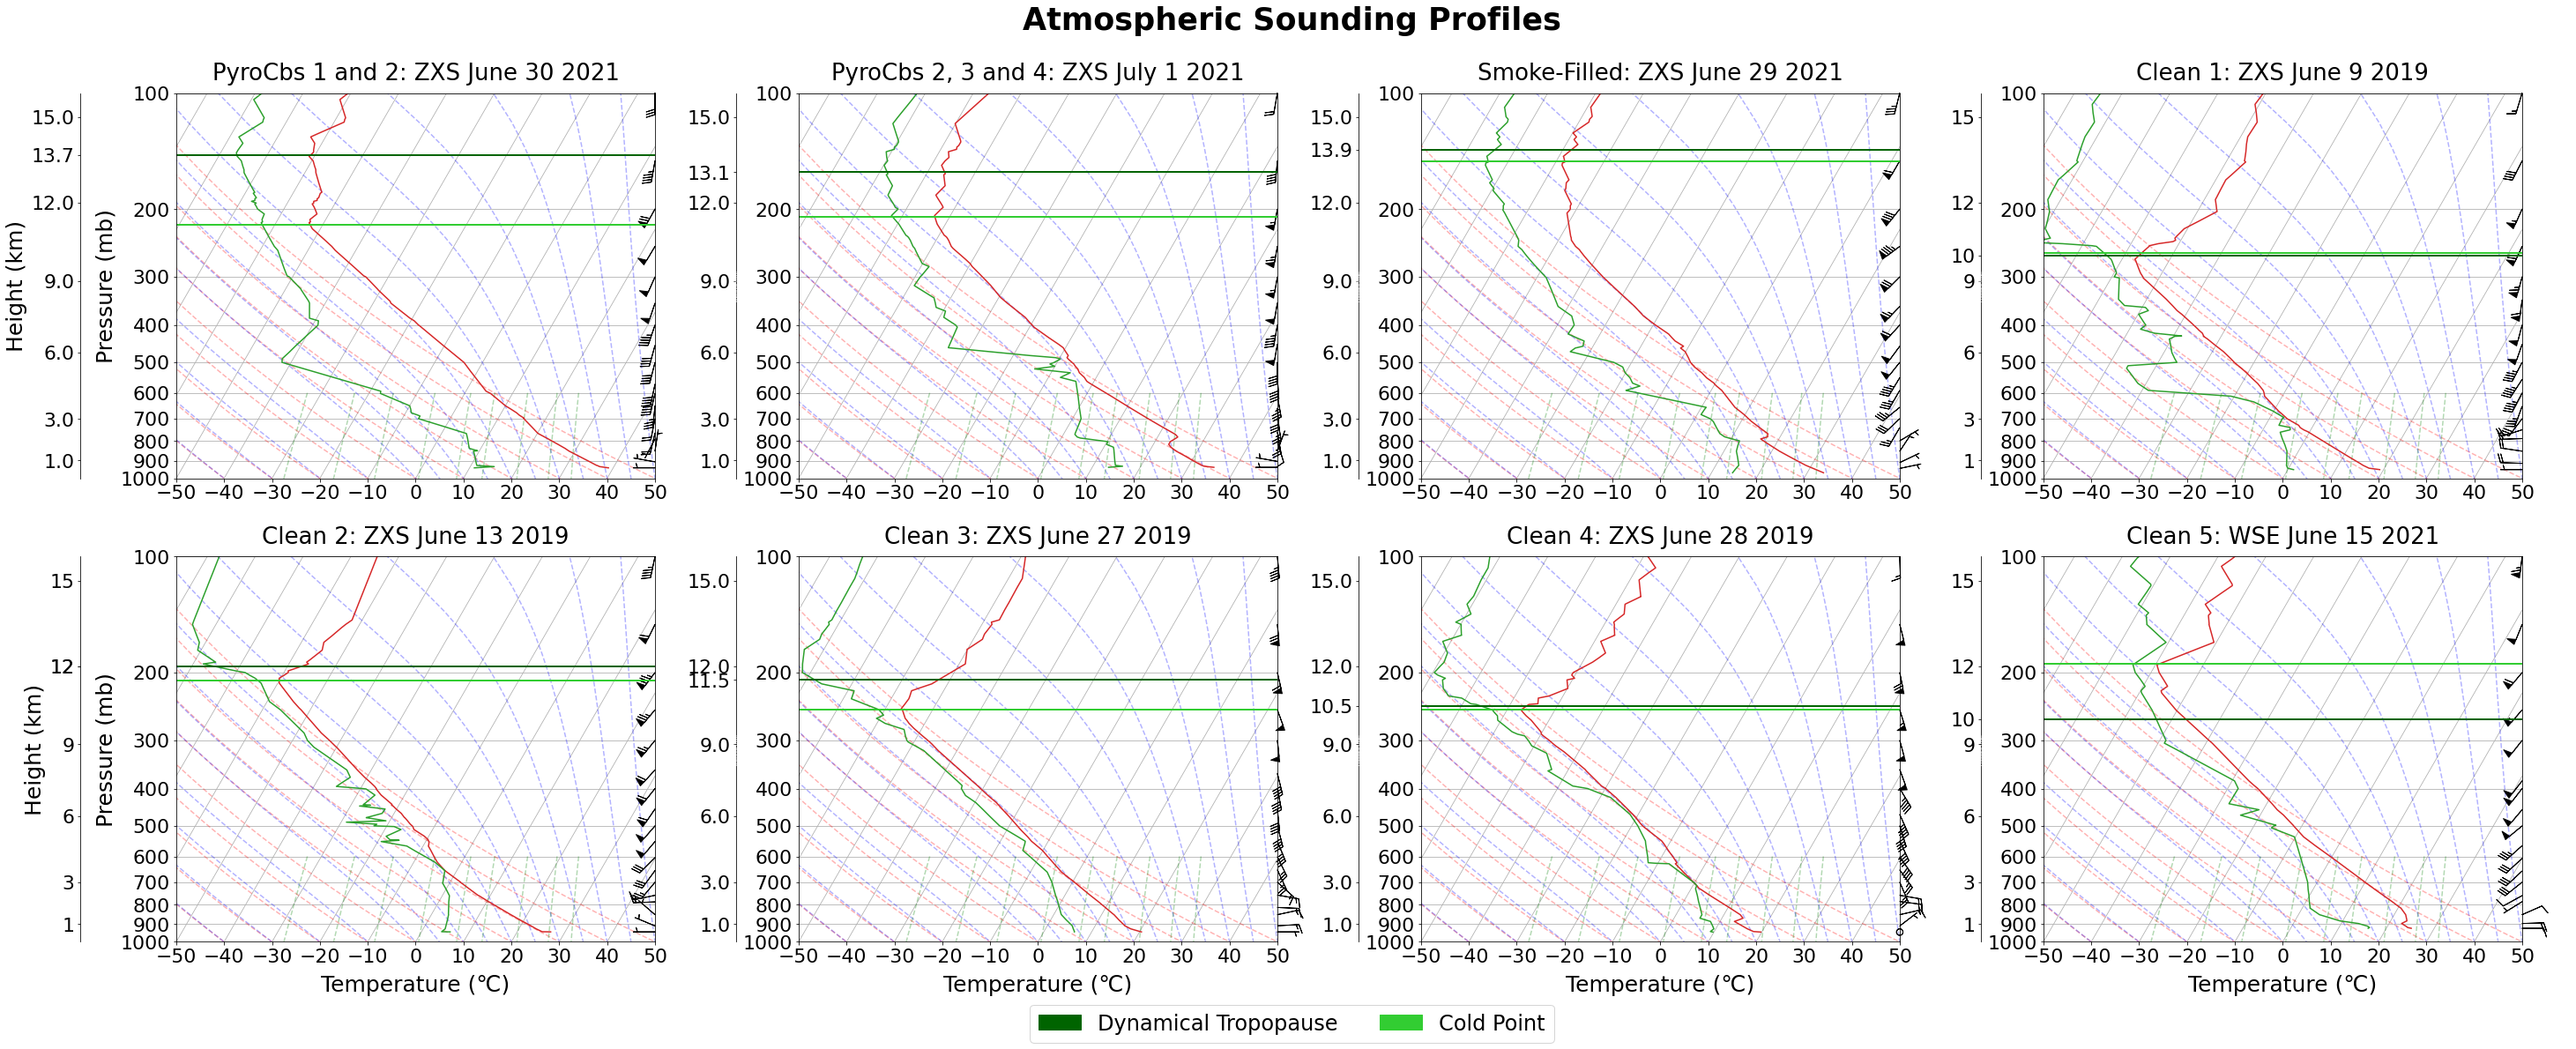

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT

dataset = [d_pyrocb1, d_pyrocb2, d_smoke, d_clean1, d_clean2, d_clean3, d_clean4, d_clean5]
titles = ["PyroCbs 1 and 2: ZXS June 30 2021",
          "PyroCbs 2, 3 and 4: ZXS July 1 2021",
          "Smoke-Filled: ZXS June 29 2021",
          "Clean 1: ZXS June 9 2019",
          "Clean 2: ZXS June 13 2019",
          "Clean 3: ZXS June 27 2019",
          "Clean 4: ZXS June 28 2019",
          "Clean 5: WSE June 15 2021"]

tropopause = [13.7, 13.1, 13.9, 10.0, 12.0, 11.5, 10.5, 10.0]
coldpoint = [220, 210, 150, 260, 210, 250, 250, 190 ]


fig = plt.figure(figsize=(40, 15)) 
for i in range(len(dataset)):
    skew = SkewT(fig, subplot = (2,4,i+1))  # Pass the figure to the SkewT constructor
    
    skew.plot(dataset[i]["pressure"], dataset[i]["temperature"], 'tab:red')
    skew.plot(dataset[i]["pressure"], dataset[i]["dewpoint"], 'tab:green')
    if i >= 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 25, labelpad = 10)
    if i < 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 5, color = "white")
    
    if (i == 0) or (i == 4): 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 25)
    else: 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 5, color = "white")
    
    
    my_interval = np.arange(100, 1000, 50) * units('mbar')

    ix = mpcalc.resample_nn_1d(dataset[i]["pressure"], my_interval)
    skew.plot_barbs(dataset[i]["pressure"][ix], dataset[i]["u_wind"][ix], d_pyrocb2["v_wind"][ix])

    # Add the relevant special lines
    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)
    skew.plot_mixing_lines(alpha=0.3)
    
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-50, 50)
    skew.ax.tick_params(axis='both', which='major', labelsize=22)

    trop_p = mpcalc.height_to_pressure_std(units.Quantity(tropopause[i], 'km')).m
    skew.ax.axhline(y=trop_p, linestyle='-', color="darkgreen", linewidth = 2)
    skew.ax.axhline(y=coldpoint[i], linestyle='-', color="limegreen", linewidth = 2)
    
    # add height labels to right y-axis
    if (i == 0) or (i == 4): 
        secax = skew.ax.secondary_yaxis(-0.2,
                                        functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                                   lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
    else: 
        secax = skew.ax.secondary_yaxis(-0.13,
                                functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                           lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))

    secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12, tropopause[i], 15]))
    secax.yaxis.set_minor_locator(plt.NullLocator())
    secax.yaxis.set_major_formatter(plt.ScalarFormatter())
    secax.tick_params(axis='y', which='major', labelsize=22)
    
    if (i == 0) or (i == 4): 
        secax.set_ylabel('Height (km)', fontsize = 25)
    else:
        secax.set_ylabel('Height (km)', fontsize = 5, color = "white")
        
    plt.title(titles[i], fontsize=26, y = 1.02)

darkgreen = mpatches.Patch(facecolor='darkgreen', edgecolor = "darkgreen", label=("Dynamical Tropopause"))
limegreen = mpatches.Patch(facecolor='limegreen', edgecolor = "limegreen", label=("Cold Point"))

fig.legend(handles=[darkgreen, limegreen], loc='lower center', 
            bbox_to_anchor=(0.5, -0.05),
            ncol=2, fancybox=True, shadow=False, fontsize = 24, markerscale=3.,)

# Adjust the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.suptitle("Atmospheric Sounding Profiles", y = 1.05, fontweight='bold', fontsize = 35)
# Display the figure with all subplots
plt.show()


## tester version

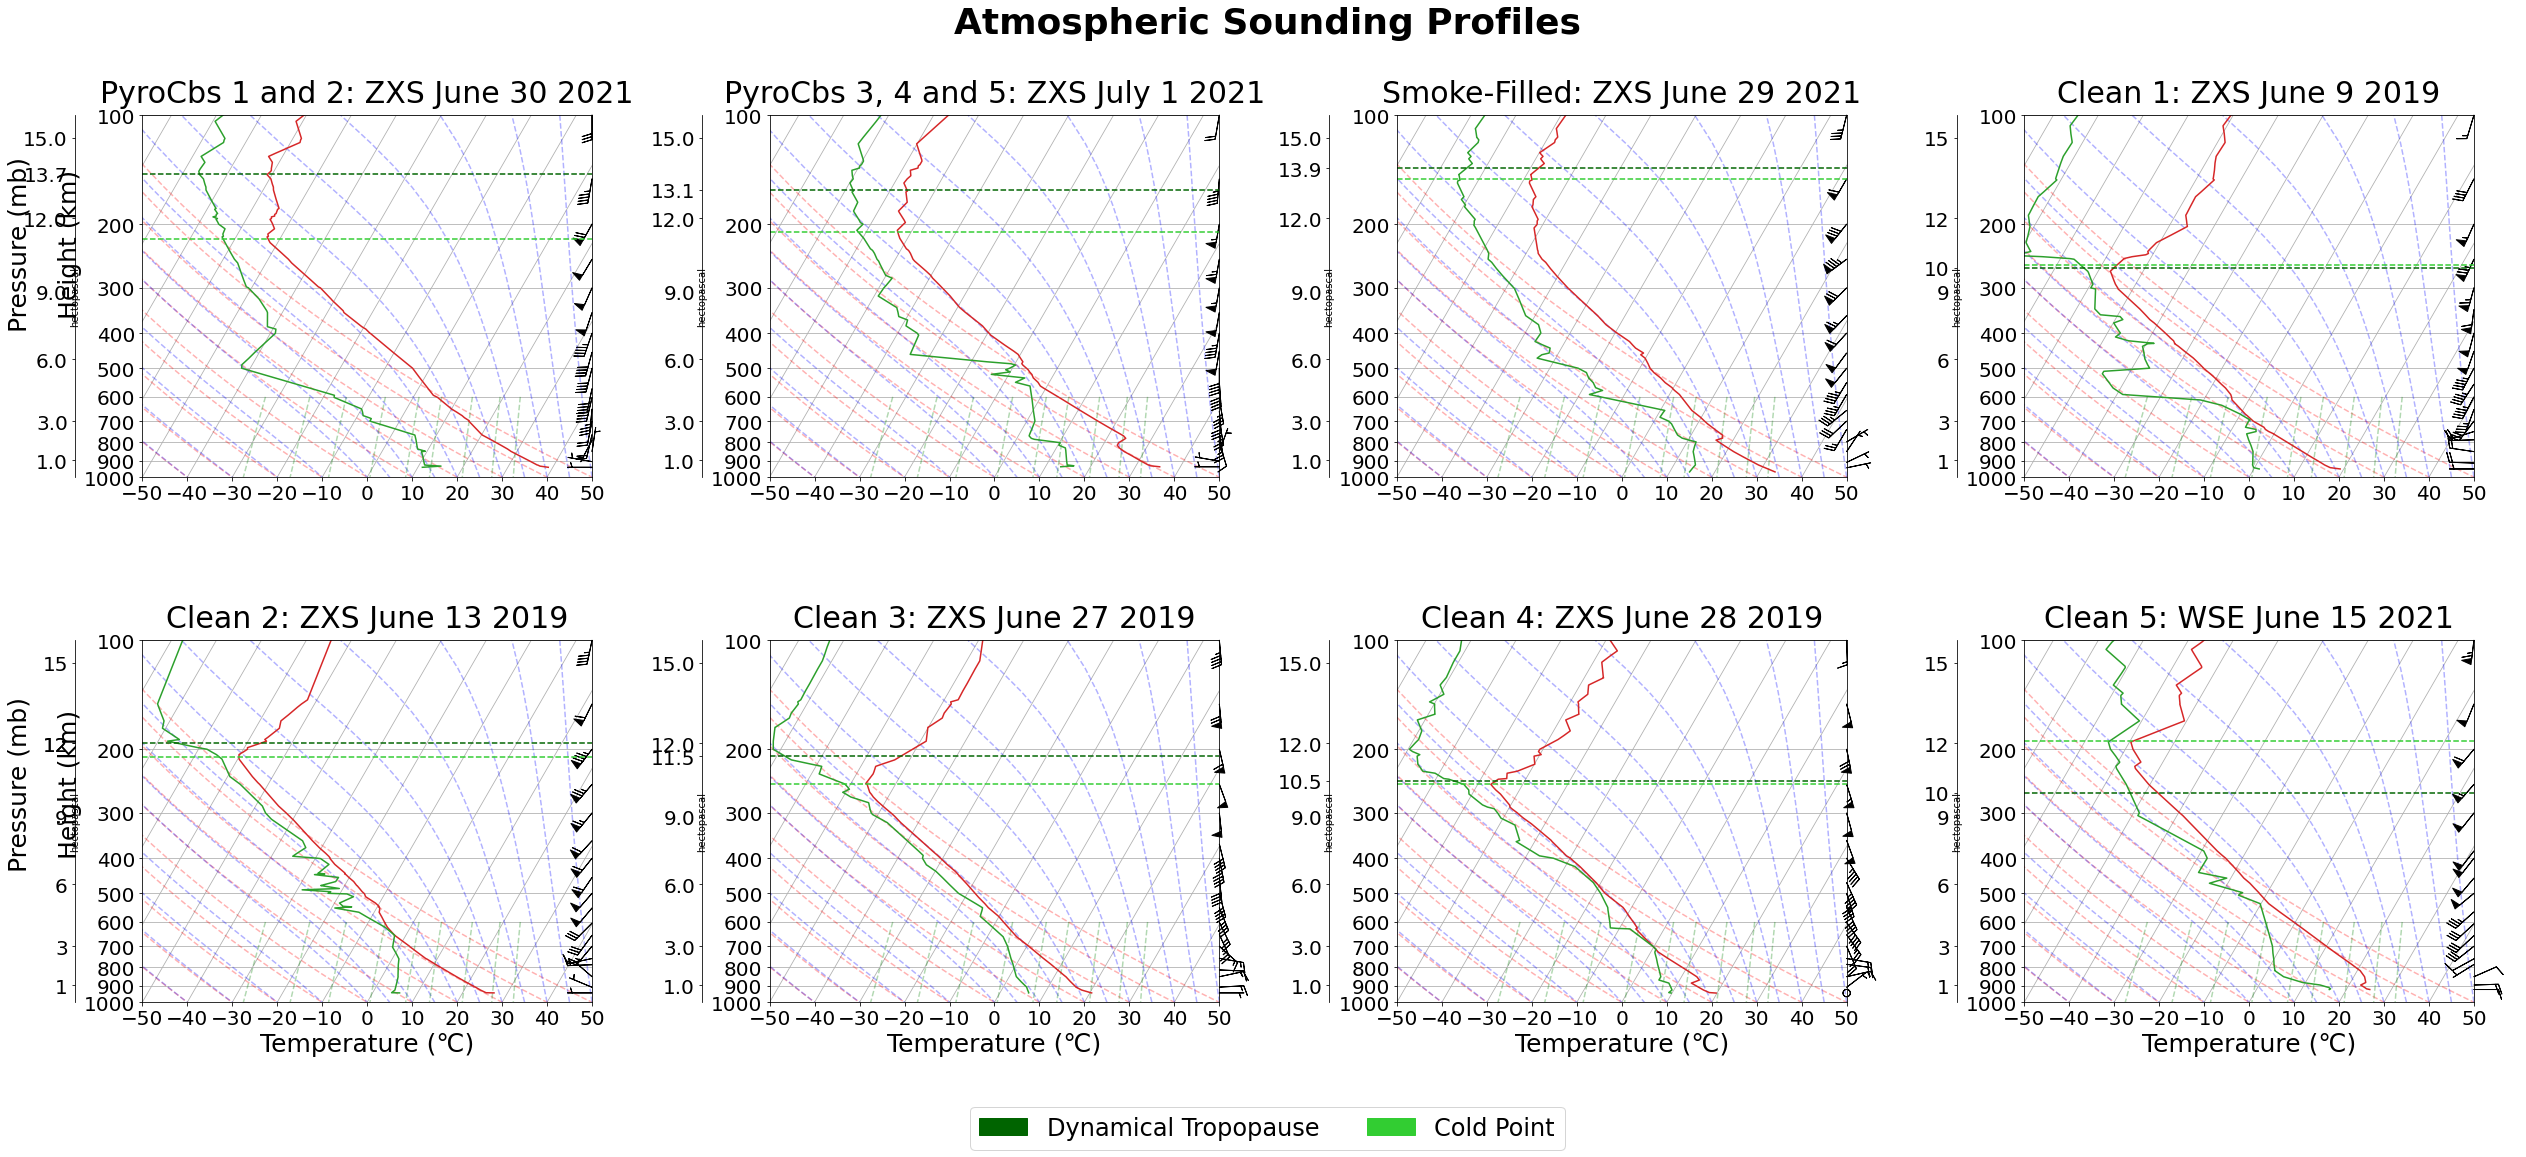

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT

dataset = [d_pyrocb1, d_pyrocb2, d_smoke, d_clean1, d_clean2, d_clean3, d_clean4, d_clean5]
titles = ["PyroCbs 1 and 2: ZXS June 30 2021",
          "PyroCbs 3, 4 and 5: ZXS July 1 2021",
          "Smoke-Filled: ZXS June 29 2021",
          "Clean 1: ZXS June 9 2019",
          "Clean 2: ZXS June 13 2019",
          "Clean 3: ZXS June 27 2019",
          "Clean 4: ZXS June 28 2019",
          "Clean 5: WSE June 15 2021"]

tropopause = [13.7, 13.1, 13.9, 10.0, 12.0, 11.5, 10.5, 10.0]
coldpoint = [220, 210, 150, 260, 210, 250, 250, 190 ]


fig = plt.figure(figsize=(35, 15)) 
for i in range(len(dataset)):
    skew = SkewT(fig, subplot = (2,4,i+1))  # Pass the figure to the SkewT constructor
    
    skew.plot(dataset[i]["pressure"], dataset[i]["temperature"], 'tab:red')
    skew.plot(dataset[i]["pressure"], dataset[i]["dewpoint"], 'tab:green')
    
    if i < 4: 
        skew.ax.set_xlabel('T', fontsize = 5, color = "white")
    if i >= 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 25, color = "black")

#     if i == (1| 2 | 4 | 5 | 7): 
#         skew.ax.set_ylabel('xx', fontsize = 20, color = "red")  
#     if i == (0 | 3 | 6): 
#    skew.ax.set_ylabel('Pressure (mb)', fontsize = 25, color = "black")
      
        
    my_interval = np.arange(100, 1000, 50) * units('mbar')

    ix = mpcalc.resample_nn_1d(dataset[i]["pressure"], my_interval)
    skew.plot_barbs(dataset[i]["pressure"][ix], dataset[i]["u_wind"][ix], d_pyrocb2["v_wind"][ix])

    # Add the relevant special lines
    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)
    skew.plot_mixing_lines(alpha=0.3)
    
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-50, 50)
    skew.ax.tick_params(axis='both', which='major', labelsize=20)

    trop_p = mpcalc.height_to_pressure_std(units.Quantity(tropopause[i], 'km')).m
    skew.ax.axhline(y=trop_p, linestyle='--', color="darkgreen")
    skew.ax.axhline(y=coldpoint[i], linestyle='--', color="limegreen")
    
    # add height labels to right y-axis
    secax = skew.ax.secondary_yaxis(-0.15,
                                    functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                               lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
    secax.yaxis.set_major_locator(plt.FixedLocator([0, 1, 3, 6, 9, 12, tropopause[i], 15]))
    secax.yaxis.set_minor_locator(plt.NullLocator())
    secax.yaxis.set_major_formatter(plt.ScalarFormatter())
    secax.tick_params(axis='y', which='major', labelsize=20)
    secax.set_ylabel('Height (km)', fontsize = 5, color = "white")
    
    plt.title(titles[i], fontsize=30, y = 1.02)

fig.text(0.0, 0.8, "Pressure (mb)", va='center', rotation='vertical', fontsize = 25)
fig.text(0.0, 0.3, "Pressure (mb)", va='center', rotation='vertical', fontsize = 25)
fig.text(0.02, 0.8, "Height (km)", va='center', rotation='vertical', fontsize = 25)
fig.text(0.02, 0.3, "Height (km)", va='center', rotation='vertical', fontsize = 25)

darkgreen = mpatches.Patch(facecolor='darkgreen', edgecolor = "darkgreen", label=("Dynamical Tropopause"))
limegreen = mpatches.Patch(facecolor='limegreen', edgecolor = "limegreen", label=("Cold Point"))

fig.legend(handles=[darkgreen, limegreen], loc='lower center', 
            bbox_to_anchor=(0.5, -0.05),
            ncol=2, fancybox=True, shadow=False, fontsize = 24, markerscale=3.,)

# Adjust the layout of the subplots
plt.tight_layout()
# plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.suptitle("Atmospheric Sounding Profiles", y = 1.02, fontweight='bold', fontsize = 36)
# Display the figure with all subplots
plt.show()


In [9]:
coldpoint = [220, 210, 150, 260, 210, 250, 250, 190 ]
for i in range(len(coldpoint)): 
    cp = mpcalc.pressure_to_height_std(units.Quantity(coldpoint[i], 'hPa')).m_as('km')
    print(cp)

11.173137898798712
11.465113725624475
13.501714709781766
10.103086403812174
11.465113725624475
10.357375151717509
10.357375151717509
12.084580002163207


In [10]:
# pyrocb 1 : 11.17 : -48 
# pyrocb 2: 11.46 : -49
# smoke: 13.5 : -58 
# clean 1 : 10.1 : -56
# clean 2 : 11.5 : -60 
# clean 3 : 10.3 : -56 
# clean 4 : 10. 4 -56 
# clean 5 : 12.0 : -58 

## new skew-t updated tropopauses

- label	trop_height
- smoke-filled	14272.64348
- clean 1	9002.419226
- clean 2	12368.73986
- clean 3	11192.03906
- clean 4	10167.69797
- clean 5	11407.45602

- fire_name		trop_height
- K71030 (McKay Creek) pyrocb 1		14795.61898
- K21001 (Sparks Lake) pyrocb 2		14449.09826
- K21001 (Sparks Lake) pyrocb 4		13721.05294
- K71030 (McKay Creek) pyrocb 3		14089.26864
- K71086 (Lytton) pyrocb 5		13641.75385

In [11]:
# tropopause = [220, 210, 150, 260, 210, 250, 250, 190 ]
# for i in range(len(tropopause)): 
#     tropo = mpcalc.height_to_temperature_std(units.Quantity(tropopause[i], 'km')).m_as('C')
#     print(tropo)

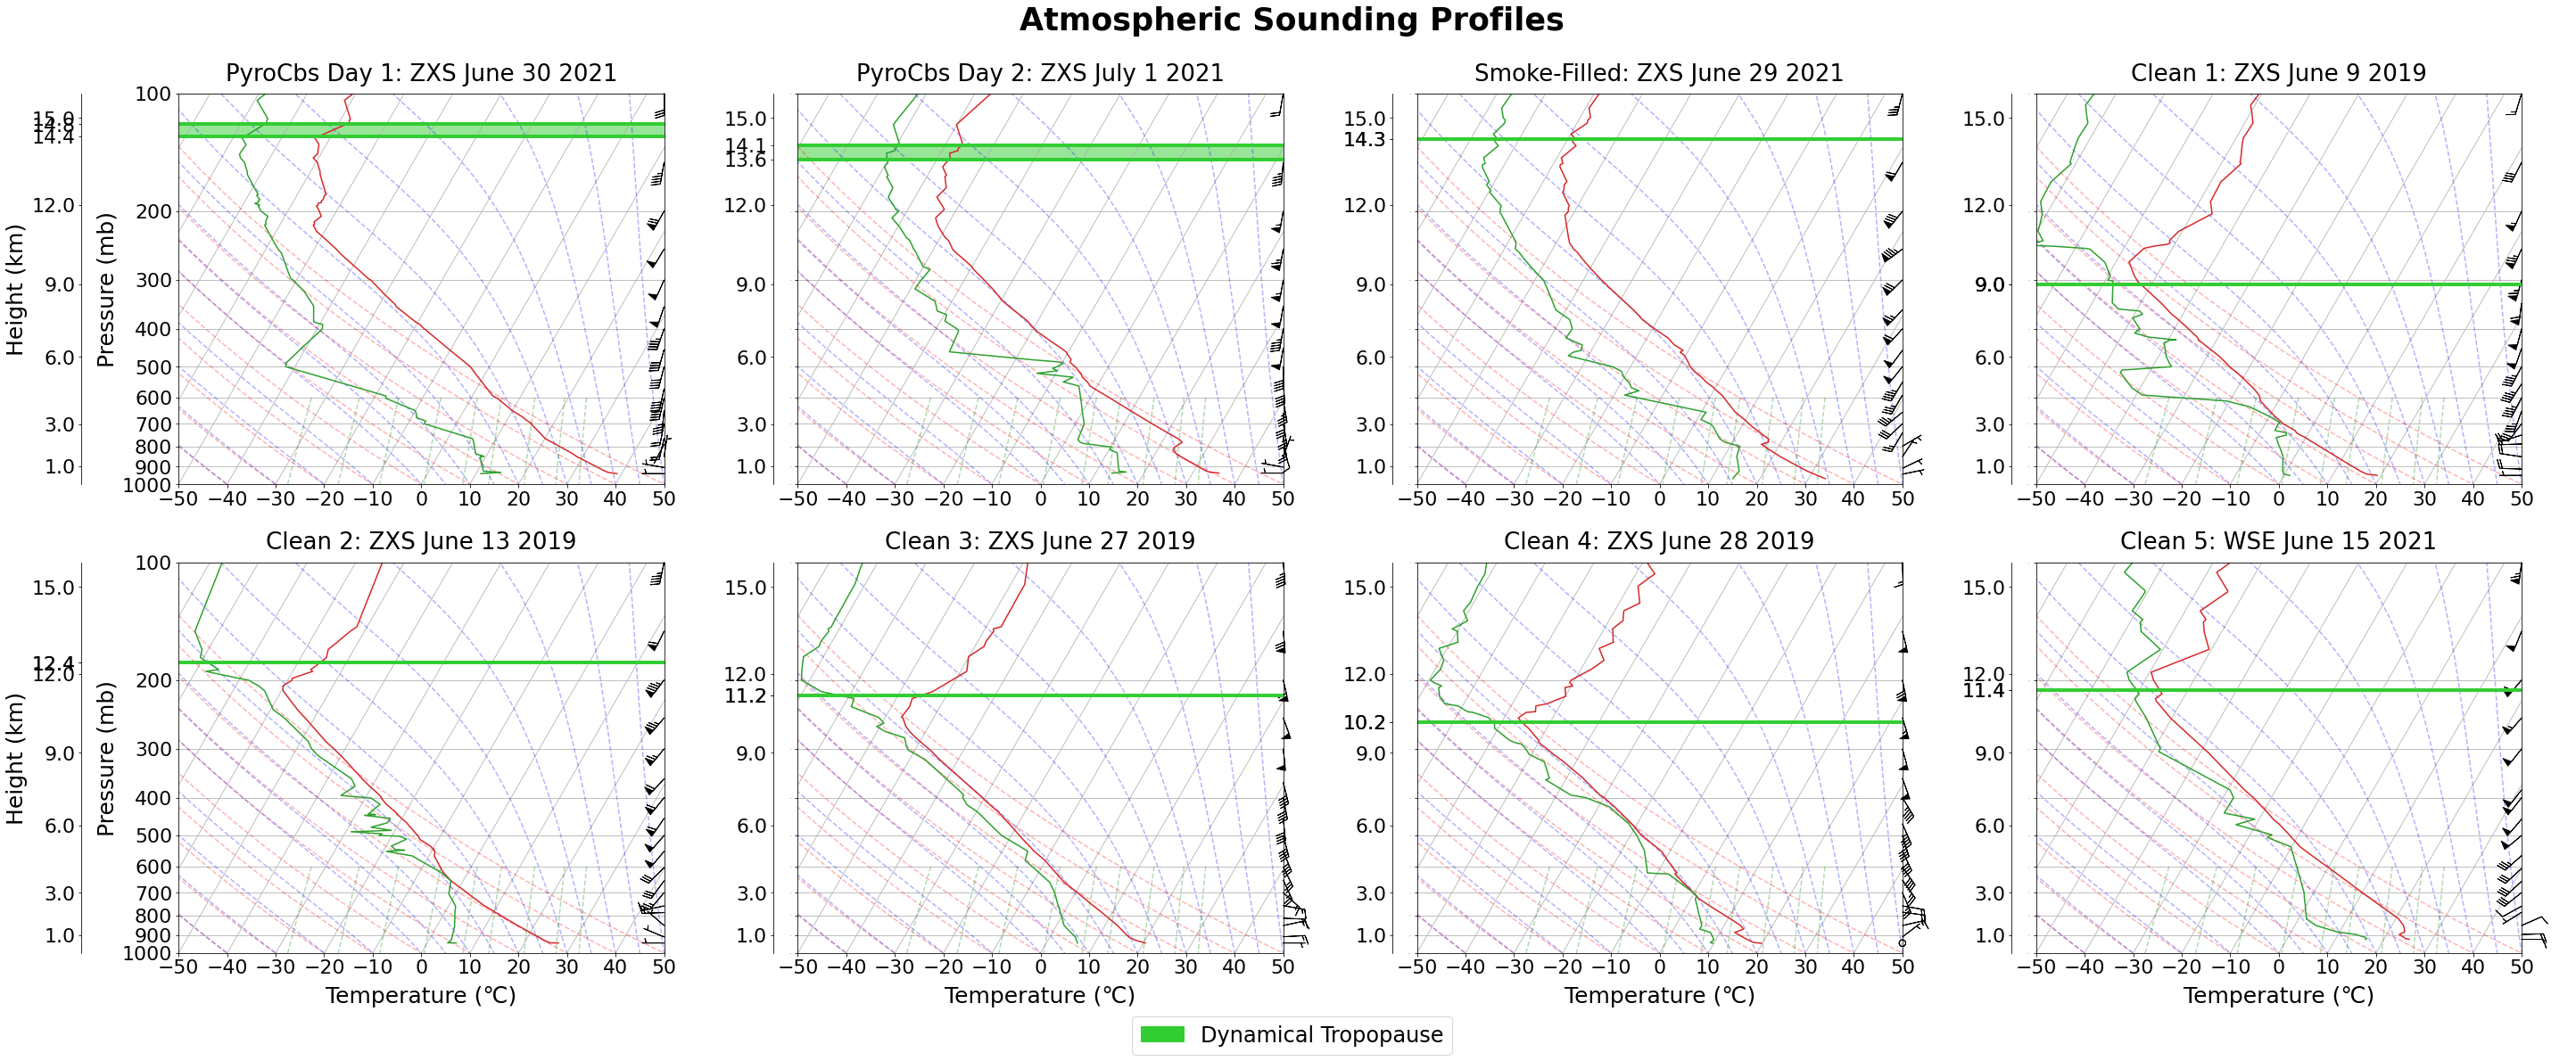

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT

dataset = [d_pyrocb1, d_pyrocb2, d_smoke, d_clean1, d_clean2, d_clean3, d_clean4, d_clean5]
titles = ["PyroCbs Day 1: ZXS June 30 2021",
          "PyroCbs Day 2: ZXS July 1 2021",
          "Smoke-Filled: ZXS June 29 2021",
          "Clean 1: ZXS June 9 2019",
          "Clean 2: ZXS June 13 2019",
          "Clean 3: ZXS June 27 2019",
          "Clean 4: ZXS June 28 2019",
          "Clean 5: WSE June 15 2021"]

tropopause_min = [14.4, 13.6, 14.3, 9.0, 12.4, 11.2, 10.2, 11.4]
tropopause_max = [14.8, 14.1, 14.3, 9.0, 12.4, 11.2, 10.2, 11.4]


fig = plt.figure(figsize=(40, 15)) 
for i in range(len(dataset)):
    skew = SkewT(fig, subplot = (2,4,i+1))  # Pass the figure to the SkewT constructor
    
    skew.plot(dataset[i]["pressure"], dataset[i]["temperature"], 'tab:red')
    skew.plot(dataset[i]["pressure"], dataset[i]["dewpoint"], 'tab:green')
    if i >= 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 25, labelpad = 10)
    if i < 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 5, color = "white")
    
    
    
    my_interval = np.arange(100, 1000, 50) * units('mbar')

    ix = mpcalc.resample_nn_1d(dataset[i]["pressure"], my_interval)
    skew.plot_barbs(dataset[i]["pressure"][ix], dataset[i]["u_wind"][ix], d_pyrocb2["v_wind"][ix])

    # Add the relevant special lines
    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)
    skew.plot_mixing_lines(alpha=0.3)
    
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-50, 50)
    skew.ax.tick_params(axis='x', which='major', labelsize=22)

    if (i == 0) or (i == 4): 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 25)
        skew.ax.tick_params(axis='y', which='major', labelsize=22)

    else: 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 5, color = "white")
        skew.ax.tick_params(axis='y', which='major', labelsize=0)

    trop_p_max = mpcalc.height_to_pressure_std(units.Quantity(tropopause_max[i], 'km')).m
    trop_p_min = mpcalc.height_to_pressure_std(units.Quantity(tropopause_min[i], 'km')).m
    
    if (i <= 1):     
        skew.ax.axhspan(trop_p_min, trop_p_max, facecolor="limegreen", alpha=0.5) 
        skew.ax.axhline(y=trop_p_min, linestyle='-', color="limegreen", linewidth = 4)
        skew.ax.axhline(y=trop_p_max, linestyle='-', color="limegreen", linewidth = 4)
    else:
        skew.ax.axhline(y=trop_p_max, linestyle='-', color="limegreen", linewidth = 4)

    # add height labels to right y-axis
    if (i == 0) or (i == 4): 
        secax = skew.ax.secondary_yaxis(-0.2,
                                        functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                                   lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
    else: 
        secax = skew.ax.secondary_yaxis(-0.05,
                                functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                           lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))

    secax.yaxis.set_major_locator(ticker.FixedLocator([0.0, 1.0, 3.0, 6.0, 9.0, 12.0, tropopause_min[i], tropopause_max[i], 15.0]))
    secax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))    
    secax.yaxis.set_minor_locator(plt.NullLocator())
    secax.tick_params(axis='y', which='major', labelsize=22)
    
    if (i == 0) or (i == 4): 
        secax.set_ylabel('Height (km)', fontsize = 25)
    else:
        secax.set_ylabel('Height (km)', fontsize = 5, color = "white")
        
    plt.title(titles[i], fontsize=26, y = 1.02)

limegreen = mpatches.Patch(facecolor='limegreen', edgecolor = "limegreen", label=("Dynamical Tropopause"))

fig.legend(handles=[limegreen], loc='lower center', 
            bbox_to_anchor=(0.5, -0.05),
            ncol=2, fancybox=True, shadow=False, fontsize = 24, markerscale=3.,)

# Adjust the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.suptitle("Atmospheric Sounding Profiles", y = 1.05, fontweight='bold', fontsize = 35)
# Display the figure with all subplots
plt.show()


# warm cloud depth

In [13]:
df_pyrocb1 = pd.DataFrame(d_pyrocb1)
fl_pyrocb1 = df_pyrocb1.loc[(df_pyrocb1["temperature"] <= 4) & (df_pyrocb1["temperature"] >= -3)]
fl_pyrocb1 = np.mean(fl_pyrocb1.height) /1000 * units.km
print("Freezing Level Height:", fl_pyrocb1)

temperature = df_pyrocb1['temperature'].values * units.degC
dewpoint = df_pyrocb1['dewpoint'].values * units.degC
pressure = df_pyrocb1['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_pyrocb1 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_pyrocb1)
wcd_pyrocb1 = fl_pyrocb1 - lcl_pyrocb1
wcd_pyrocb1

Freezing Level Height: 5.1815 kilometer
LCL Height: 3.857319511016037 kilometer


1.3241804889839628 <Unit('kilometer')>

In [14]:
df_pyrocb2 = pd.DataFrame(d_pyrocb2)
fl_pyrocb2 = df_pyrocb2.loc[(df_pyrocb2["temperature"] <= 4) & (df_pyrocb2["temperature"] >= -2)]
fl_pyrocb2 = np.mean(fl_pyrocb2.height) /1000 * units.km
print("Freezing Level Height:", fl_pyrocb2)

temperature = df_pyrocb2['temperature'].values * units.degC
dewpoint = df_pyrocb2['dewpoint'].values * units.degC
pressure = df_pyrocb2['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_pyrocb2 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_pyrocb2)
wcd_pyrocb2 = fl_pyrocb2 - lcl_pyrocb2
wcd_pyrocb2

Freezing Level Height: 4.927 kilometer
LCL Height: 3.2244508230204834 kilometer


1.7025491769795162 <Unit('kilometer')>

In [15]:
df_smoke = pd.DataFrame(d_smoke)
fl_smoke = df_smoke.loc[(df_smoke["temperature"] <= 1) & (df_smoke["temperature"] >= -1)]
fl_smoke = np.mean(fl_smoke.height) /1000 * units.km
print("Freezing Level Height:", fl_smoke)

temperature = df_smoke['temperature'].values * units.degC
dewpoint = df_smoke['dewpoint'].values * units.degC
pressure = df_smoke['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_smoke = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_smoke)
wcd_smoke = fl_smoke - lcl_smoke
wcd_smoke

Freezing Level Height: 4.857 kilometer
LCL Height: 2.6329133830730242 kilometer


2.224086616926976 <Unit('kilometer')>

In [16]:
df_clean1 = pd.DataFrame(d_clean1)
fl_clean1 = df_clean1.loc[(df_clean1["temperature"] <= 1) & (df_clean1["temperature"] >= -1)]
fl_clean1 = np.mean(fl_clean1.height) /1000 * units.km
print("Freezing Level Height:", fl_clean1)

temperature = df_clean1['temperature'].values * units.degC
dewpoint = df_clean1['dewpoint'].values * units.degC
pressure = df_clean1['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_clean1 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_clean1)
wcd_clean1 = fl_clean1 - lcl_clean1
wcd_clean1

Freezing Level Height: 2.4405 kilometer
LCL Height: 2.739440459531184 kilometer


-0.29894045953118376 <Unit('kilometer')>

In [17]:
df_clean2 = pd.DataFrame(d_clean2)
fl_clean2 = df_clean2.loc[(df_clean2["temperature"] <= 3) & (df_clean2["temperature"] >= -3)]
fl_clean2 = np.mean(fl_clean2.height) /1000 * units.km
print("Freezing Level Height:", fl_clean2)

temperature = df_clean2['temperature'].values * units.degC
dewpoint = df_clean2['dewpoint'].values * units.degC
pressure = df_clean2['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_clean2 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_clean2)
wcd_clean2 = fl_clean2 - lcl_clean2
wcd_clean2

Freezing Level Height: 3.3072 kilometer
LCL Height: 3.108846177011444 kilometer


0.19835382298855597 <Unit('kilometer')>

In [18]:
df_clean3 = pd.DataFrame(d_clean3)
fl_clean3 = df_clean3.loc[(df_clean3["temperature"] <= 2) & (df_clean3["temperature"] >= -3)]
fl_clean3 = np.mean(fl_clean3.height) /1000 * units.km
print("Freezing Level Height:", fl_clean3)

temperature = df_clean3['temperature'].values * units.degC
dewpoint = df_clean3['dewpoint'].values * units.degC
pressure = df_clean3['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_clean3 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_clean3)
wcd_clean3 = fl_clean3 - lcl_clean3
wcd_clean3

Freezing Level Height: 3.211 kilometer
LCL Height: 2.311575823440056 kilometer


0.8994241765599438 <Unit('kilometer')>

In [19]:
df_clean4 = pd.DataFrame(d_clean4)
fl_clean4 = df_clean4.loc[(df_clean4["temperature"] <= 1) & (df_clean4["temperature"] >= -1)]
fl_clean4 = np.mean(fl_clean4.height) /1000 * units.km
print("Freezing Level Height:", fl_clean4)

temperature = df_clean4['temperature'].values * units.degC
dewpoint = df_clean4['dewpoint'].values * units.degC
pressure = df_clean4['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_clean4 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_clean4)
wcd_clean4 = fl_clean4 - lcl_clean4
wcd_clean4

Freezing Level Height: 3.0143333333333335 kilometer
LCL Height: 1.8223370451125038 kilometer


1.1919962882208297 <Unit('kilometer')>

In [20]:
df_clean5 = pd.DataFrame(d_clean5)
fl_clean5 = df_clean5.loc[(df_clean5["temperature"] <= 1) & (df_clean5["temperature"] >= -1)]
fl_clean5 = np.mean(fl_clean5.height) /1000 * units.km
print("Freezing Level Height:", fl_clean5)

temperature = df_clean5['temperature'].values * units.degC
dewpoint = df_clean5['dewpoint'].values * units.degC
pressure = df_clean5['pressure'].values * units.hPa

lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temperature[0], dewpoint[0])
lcl_clean5 = mpcalc.pressure_to_height_std(lcl_pressure) 
print("LCL Height:", lcl_clean5)
wcd_clean5 = fl_clean5 - lcl_clean5

Freezing Level Height: 4.267 kilometer
LCL Height: 1.8690437126151784 kilometer


In [21]:
print("PyroCb 1 WCD: {:.2f}".format(wcd_pyrocb1))
print("PyroCb 2 WCD: {:.2f}".format(wcd_pyrocb2))
print("Smoke WCD: {:.2f}".format(wcd_smoke))
print("Clean 1 WCD: {:.2f}".format(wcd_clean1)) 
print("Clean 2 WCD: {:.2f}".format(wcd_clean2))
print("Clean 3 WCD: {:.2f}".format(wcd_clean3))
print("Clean 4 WCD: {:.2f}".format(wcd_clean4))
print("Clean 5 WCD: {:.2f}".format(wcd_clean5))
# most positive: clean 3, clean 5, clean 4, clean 1, clean 2, smoke, pyrocb
# smaller wcd in positive storms 

PyroCb 1 WCD: 1.32 kilometer
PyroCb 2 WCD: 1.70 kilometer
Smoke WCD: 2.22 kilometer
Clean 1 WCD: -0.30 kilometer
Clean 2 WCD: 0.20 kilometer
Clean 3 WCD: 0.90 kilometer
Clean 4 WCD: 1.19 kilometer
Clean 5 WCD: 2.40 kilometer


In [22]:
print(lcl_pyrocb1, lcl_pyrocb2, lcl_smoke, lcl_clean1, lcl_clean2, lcl_clean3, lcl_clean4, lcl_clean5)

3.857319511016037 kilometer 3.2244508230204834 kilometer 2.6329133830730242 kilometer 2.739440459531184 kilometer 3.108846177011444 kilometer 2.311575823440056 kilometer 1.8223370451125038 kilometer 1.8690437126151784 kilometer


In [23]:
mpcalc.height_to_pressure_std(units.Quantity(11.7, 'km')).m

202.22528033306108

## warm cloud depth version

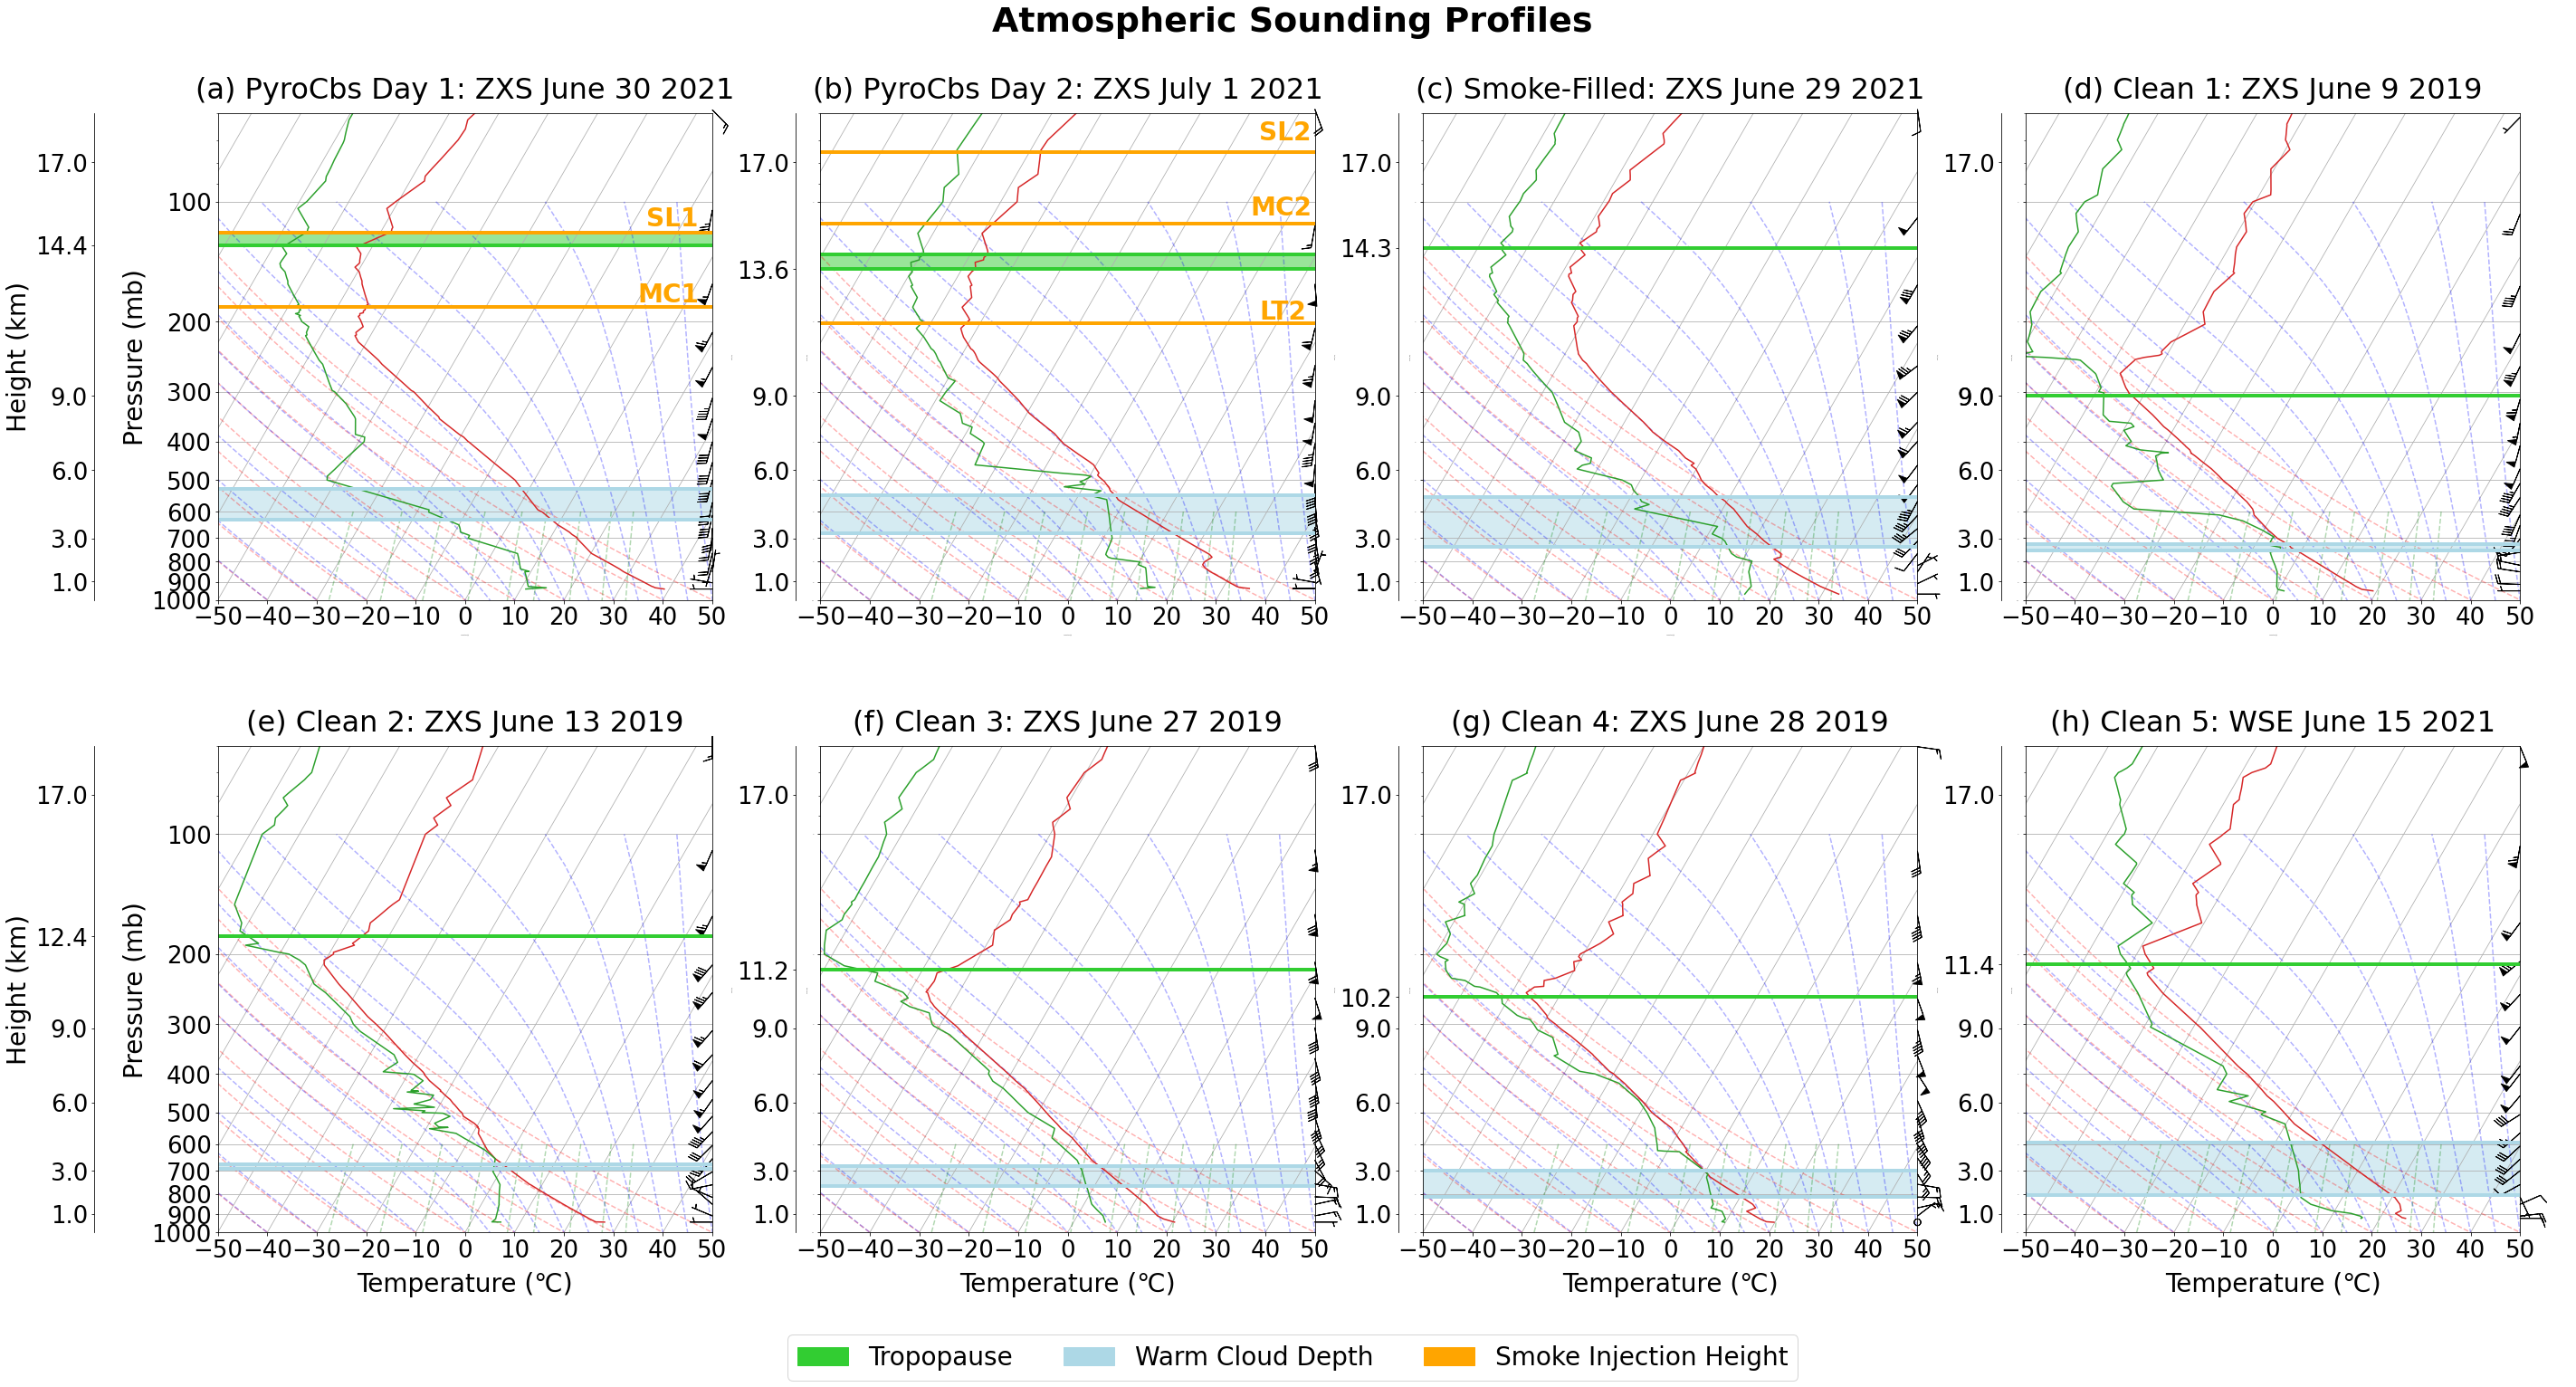

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT

dataset = [d_pyrocb1, d_pyrocb2, d_smoke, d_clean1, d_clean2, d_clean3, d_clean4, d_clean5]
titles = ["(a) PyroCbs Day 1: ZXS June 30 2021",
          "(b) PyroCbs Day 2: ZXS July 1 2021",
          "(c) Smoke-Filled: ZXS June 29 2021",
          "(d) Clean 1: ZXS June 9 2019",
          "(e) Clean 2: ZXS June 13 2019",
          "(f) Clean 3: ZXS June 27 2019",
          "(g) Clean 4: ZXS June 28 2019",
          "(h) Clean 5: WSE June 15 2021"]

tropopause_min = [14.4, 13.6, 14.3, 9.0, 12.4, 11.2, 10.2, 11.4]
tropopause_max = [14.8, 14.1, 14.3, 9.0, 12.4, 11.2, 10.2, 11.4]

fl = [5.1815, 4.927, 4.857, 2.4405, 3.3072, 3.211, 3.0143, 4.267]
lcl = [3.8573, 3.2245, 2.6329, 2.7394, 3.1088, 2.3116, 1.8223, 1.8690]


fig = plt.figure(figsize=(40,19)) 
for i in range(len(dataset)):
    skew = SkewT(fig, subplot = (2,4,i+1))  # Pass the figure to the SkewT constructor
    
    skew.plot(dataset[i]["pressure"], dataset[i]["temperature"], 'tab:red')
    skew.plot(dataset[i]["pressure"], dataset[i]["dewpoint"], 'tab:green')
    if i >= 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 28, labelpad = 10)
    if i < 4: 
        skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})', fontsize = 0)
    
    
    
    my_interval = np.arange(60, 1000, 50) * units('mbar')

    ix = mpcalc.resample_nn_1d(dataset[i]["pressure"], my_interval)
    skew.plot_barbs(dataset[i]["pressure"][ix], dataset[i]["u_wind"][ix], d_pyrocb2["v_wind"][ix])

    # Add the relevant special lines
    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)
    skew.plot_mixing_lines(alpha=0.3)
    
    skew.ax.set_ylim(1000, 60)
    skew.ax.set_xlim(-50, 50)
    skew.ax.tick_params(axis='x', which='major', labelsize=26)

    if (i == 0) or (i == 4): 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 28)
        skew.ax.tick_params(axis='y', which='major', labelsize=26)

    else: 
        skew.ax.set_ylabel('Pressure (mb)', fontsize = 0)
        skew.ax.tick_params(axis='y', which='major', labelsize=0)

    #tropo
    trop_p_max = mpcalc.height_to_pressure_std(units.Quantity(tropopause_max[i], 'km')).m
    trop_p_min = mpcalc.height_to_pressure_std(units.Quantity(tropopause_min[i], 'km')).m

    #wcd 
    fl_p = mpcalc.height_to_pressure_std(units.Quantity(fl[i], 'km')).m
    lcl_p = mpcalc.height_to_pressure_std(units.Quantity(lcl[i], 'km')).m
 
    if (i <= 1): 
        #tropo
        skew.ax.axhspan(trop_p_min, trop_p_max, facecolor="limegreen", alpha=0.5) 
        skew.ax.axhline(y=trop_p_min, linestyle='-', color="limegreen", linewidth = 4)
        skew.ax.axhline(y=trop_p_max, linestyle='-', color="limegreen", linewidth = 4)

    else:
        skew.ax.axhline(y=trop_p_max, linestyle='-', color="limegreen", linewidth = 4)

    #wcd 
    skew.ax.axhspan(fl_p, lcl_p, facecolor="lightblue", alpha=0.5) 
    skew.ax.axhline(y=fl_p, linestyle='-', color="lightblue", linewidth = 4)
    skew.ax.axhline(y=lcl_p, linestyle='-', color="lightblue", linewidth = 4)
    
    # smoke injection 
    if (i == 0): 
        skew.ax.axhline(y=mpcalc.height_to_pressure_std(units.Quantity(14.8, 'km')).m, linestyle='-', color="orange", linewidth = 4)
        skew.ax.annotate("SL1", (-7, 115), fontsize = 28, color = "orange", fontweight='bold')
        skew.ax.axhline(y=mpcalc.height_to_pressure_std(units.Quantity(12.3, 'km')).m, linestyle='-', color="orange", linewidth = 4)
        skew.ax.annotate("MC1", (0, 178), fontsize = 28, color = "orange", fontweight='bold')

    if (i == 1): 
        skew.ax.axhline(y=mpcalc.height_to_pressure_std(units.Quantity(17.3, 'km')).m, linestyle='-', color="orange", linewidth = 4)
        skew.ax.annotate("SL2", (-15, 70), fontsize = 28, color = "orange", fontweight='bold')
        skew.ax.axhline(y=mpcalc.height_to_pressure_std(units.Quantity(15.1, 'km')).m, linestyle='-', color="orange", linewidth = 4)
        skew.ax.annotate("MC2", (-8, 108), fontsize = 28, color = "orange", fontweight='bold')
        skew.ax.axhline(y=mpcalc.height_to_pressure_std(units.Quantity(11.7, 'km')).m, linestyle='-', color="orange", linewidth = 4)
        skew.ax.annotate("LT2", (6, 197), fontsize = 28, color = "orange", fontweight='bold')

    
    # add height labels to right y-axis
    if (i == 0) or (i == 4): 
        secax = skew.ax.secondary_yaxis(-0.25,
                                        functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                                   lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))
    else: 
        secax = skew.ax.secondary_yaxis(-0.05,
                                functions=(lambda p: mpcalc.pressure_to_height_std(units.Quantity(p, 'hPa')).m_as('km'),
                                           lambda h: mpcalc.height_to_pressure_std(units.Quantity(h, 'km')).m))


        
    secax.yaxis.set_major_locator(ticker.FixedLocator([0.0, 1.0, 3.0, 6.0, 9.0, tropopause_min[i], 17.0]))
    
    secax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))    
    secax.yaxis.set_minor_locator(plt.NullLocator())
    secax.tick_params(axis='y', which='major', labelsize=26)
    
    if (i == 0) or (i == 4): 
        secax.set_ylabel('Height (km)', fontsize = 28)
    else:
        secax.set_ylabel('Height (km)', fontsize = 0)
        
    plt.title(titles[i], fontsize=32, y = 1.02)

limegreen = mpatches.Patch(facecolor='limegreen', edgecolor = "limegreen", label=("Tropopause"))
lightblue = mpatches.Patch(facecolor='lightblue', edgecolor = "lightblue", label=("Warm Cloud Depth"))
orange = mpatches.Patch(facecolor='orange', edgecolor = "orange", label=("Smoke Injection Height"))
fig.legend(handles=[limegreen, lightblue, orange], loc='lower center', 
            bbox_to_anchor=(0.5, -0.07),
            ncol=3, fancybox=True, shadow=False, fontsize = 28, markerscale=3.,)

# Adjust the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.suptitle("Atmospheric Sounding Profiles", y = 1.05, fontweight='bold', fontsize = 38)
plt.savefig("skewt_final", bbox_inches = "tight", dpi = 900)

# Display the figure with all subplots
plt.show()


## get temps

In [25]:
df_clean5.loc[(df_clean5.height > 11000) & (df_clean5.height < 13000)]

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
34     226.0   11388        -55.3     -59.5      215.0   68.0  39.003198   
35     223.0   11472        -55.7     -59.9      215.0   69.0  39.576774   
36     219.2   11582        -55.2     -59.7      215.0   70.0  40.150351   
37     218.0   11616        -55.0     -59.6      225.0   75.0  53.033009   
38     217.0   11645        -54.9     -59.6      225.0   75.0  53.033009   
39     208.8   11887        -56.5     -61.3      225.0   75.0  53.033009   
40     200.0   12160        -58.3     -63.3      215.0   66.0  37.856045   
41     191.0   12450        -59.7     -64.7      215.0   71.0  40.723927   
42     189.6   12497        -59.2     -64.5      215.0   72.0  41.297503   

       v_wind station  station_number       time  latitude  longitude  \
34  55.702339     WSE           71119 2021-06-15     53.53     -114.1   
35  56.521491     WSE           71119 2021-06-15     53.53     -114.1   
36  57.340643     WSE           71119 2021-06-15     53.53     -114.1   
37  53.033009     WSE           71119 2021-06-15     53.53     -114.1   
38  53.033009     WSE           71119 2021-06-15     53.53     -114.1   
39  53.033009     WSE           71119 2021-06-15     53.53     -114.1   
40  54.064035     WSE           71119 2021-06-15     53.53     -114.1   
41  58.159795     WSE           71119 2021-06-15     53.53     -114.1   
42  58.978947     WSE           71119 2021-06-15     53.53     -114.1   

    elevation     pw  
34      766.0  24.84  
35      766.0  24.84  
36      766.0  24.84  
37      766.0  24.84  
38      766.0  24.84  
39      766.0  24.84  
40      766.0  24.84  
41      766.0  24.84  
42      766.0  24.84

In [26]:
wcd_pyrocb2, wcd_smoke, wcd_clean1, wcd_clean2, wcd_clean3, wcd_clean4, wcd_clean5

(1.7025491769795162 <Unit('kilometer')>,
 2.224086616926976 <Unit('kilometer')>,
 -0.29894045953118376 <Unit('kilometer')>,
 0.19835382298855597 <Unit('kilometer')>,
 0.8994241765599438 <Unit('kilometer')>,
 1.1919962882208297 <Unit('kilometer')>,
 2.397956287384822 <Unit('kilometer')>)

In [27]:
# wcd and overall percent positive 
wcd = np.array([1.7025491769795162, 2.224086616926976, -0.29894045953118376, 0.19835382298855597,
                    0.8994241765599438, 1.1919962882208297, 2.397956287384822])
pos = np.array([3, 7, 14, 9, 39, 15, 26])

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(wcd, pos)

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.008688352523137707
P-value: 0.9852507513583596


In [28]:

# wcd and max percent positive 
wcd = np.array([1.7025491769795162, 2.224086616926976, 0.29894045953118376, 0.19835382298855597,
                    0.8994241765599438, 1.1919962882208297, 2.397956287384822])
pos = np.array([22.22222222222222, 12.727272727272727, 90.0, 100.0, 85.71428571428571, 54.54545454545454, 50.69444444444444])

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(wcd, pos)

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.8562388187947564
P-value: 0.013907974124368332


In [29]:
# wcd and median percent positive non zero 


# wcd and max percent positive 
wcd = np.array([1.7025491769795162, 2.224086616926976, 0.29894045953118376, 0.19835382298855597,
                    0.8994241765599438, 1.1919962882208297, 2.397956287384822])
pos = np.array([6.25,
 7.270573755289913,
 25.757575757575758,
 21.637426900584792,
 43.333333333333336,
 23.52941176470588,
 26.6820559178666])

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(wcd, pos)

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.4044669622067519
P-value: 0.3681143930467126


In [30]:
# wcd and mean percent positive non zero 


# wcd and max percent positive 
wcd = np.array([1.7025491769795162, 2.224086616926976, 0.29894045953118376, 0.19835382298855597,
                    0.8994241765599438, 1.1919962882208297, 2.397956287384822])
pos = np.array([7.079031095408388, 7.64436617197261, 35.76398994019369, 29.872325104361018, 43.23089338496649,
                24.693702347249058, 29.304624345205614])

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(wcd, pos)

# Print the results
print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.5851375905211755
P-value: 0.16756462479995135
